In [1]:
# path to all data 
DATA_PATH = "/workspace/data/lgg-mri-segmentation/kaggle_3m/"

# File path line length images for later sorting
BASE_LEN = 89 # len(/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_ <-!!!43.tif)
END_IMG_LEN = 4 # len(/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->.tif)
END_MASK_LEN = 9 # (/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->_mask.tif)

# img size
IMG_SIZE = 512

In [2]:
# docker install cv2
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import glob 
import numpy as np 
import pandas as pd
import random 

import os 

import cv2
import matplotlib.pyplot as plt 

plt.style.use("dark_background")

# Data 
## Creating a DataFrame

In [4]:
# Raw data
data_map = []
for sub_dir_path in glob.glob(DATA_PATH+"*"):
    if os.path.isdir(sub_dir_path):
        dirname = sub_dir_path.split("/")[-1]
        for filename in os.listdir(sub_dir_path):
            image_path = sub_dir_path + "/" + filename
            data_map.extend([dirname, image_path])
    else:
        print("This is not a dir:", sub_dir_path)
        
        
df = pd.DataFrame({"dirname" : data_map[::2],
                  "path" : data_map[1::2]})
df.head()

This is not a dir: /workspace/data/lgg-mri-segmentation/kaggle_3m/data.csv
This is not a dir: /workspace/data/lgg-mri-segmentation/kaggle_3m/README.md


,dirname,path
0,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...
1,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...
2,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...
3,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...
4,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...


In [5]:
# masks / not masks 
df_imgs = df[~df['path'].str.contains("mask")]
df_masks = df[df['path'].str.contains("mask")]

# data sorting 
imgs = sorted(df_imgs["path"].values, key=lambda x: int(x[BASE_LEN: -END_IMG_LEN]))
masks = sorted(df_masks["path"].values, key=lambda x: int(x[BASE_LEN:-END_MASK_LEN]))

# sorting check 
idx = random.randint(0, len(imgs)-1)
print("path to the image:", imgs[idx])
print("path to the mask:", masks[idx])

path to the image: /workspace/data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_18.tif
path to the mask: /workspace/data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_18_mask.tif


# Final dataframe 

In [6]:
# final dataframe 
df = pd.DataFrame({
    "patient": df_imgs.dirname.values,
    "image_path": imgs,
    "mask_path": masks
})

# adding A/B column for diagnosis
def positiv_negativ_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 : return 1
    else: return 0 

df["diagnosis"] = df["mask_path"].apply(lambda m: positiv_negativ_diagnosis(m))
df

,patient,image_path,mask_path,diagnosis
0,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
1,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
2,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
3,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
4,TCGA_DU_7013_19860523,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
...,...,...,...,...
3924,TCGA_DU_7306_19930512,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
3925,TCGA_DU_7306_19930512,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
3926,TCGA_DU_7306_19930512,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
3927,TCGA_DU_7306_19930512,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0


# Data Distribution 

## Distribution of positive/negative diagnosis

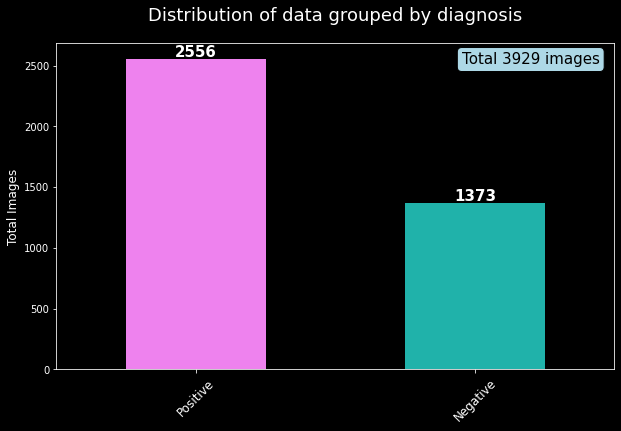

In [9]:
# plot 
ax = df.diagnosis.value_counts().plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['violet', 'lightseagreen']
)

ax.set_xticklabels(["Positive", "Negative"], rotation=45, fontsize=12);
ax.set_ylabel('Total Images', fontsize=12)
ax.set_title('Distribution of data grouped by diagnosis', fontsize = 18, y=1.05)

# Annotate 
for i, rows in enumerate(df.diagnosis.value_counts().values):
    ax.annotate(int(rows), xy=(i, rows-12),
                rotation=0, color="white",
                ha='center', verticalalignment='bottom',
                fontsize=15, fontweight='bold')

ax.text(1.2, 2550, f"Total {len(df)} images", size=15,
        color="black",
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   fc=("lightblue"),
                   ec=("black"),
                   )
         );


# Distribution of positive/negative diagnosis between each patient

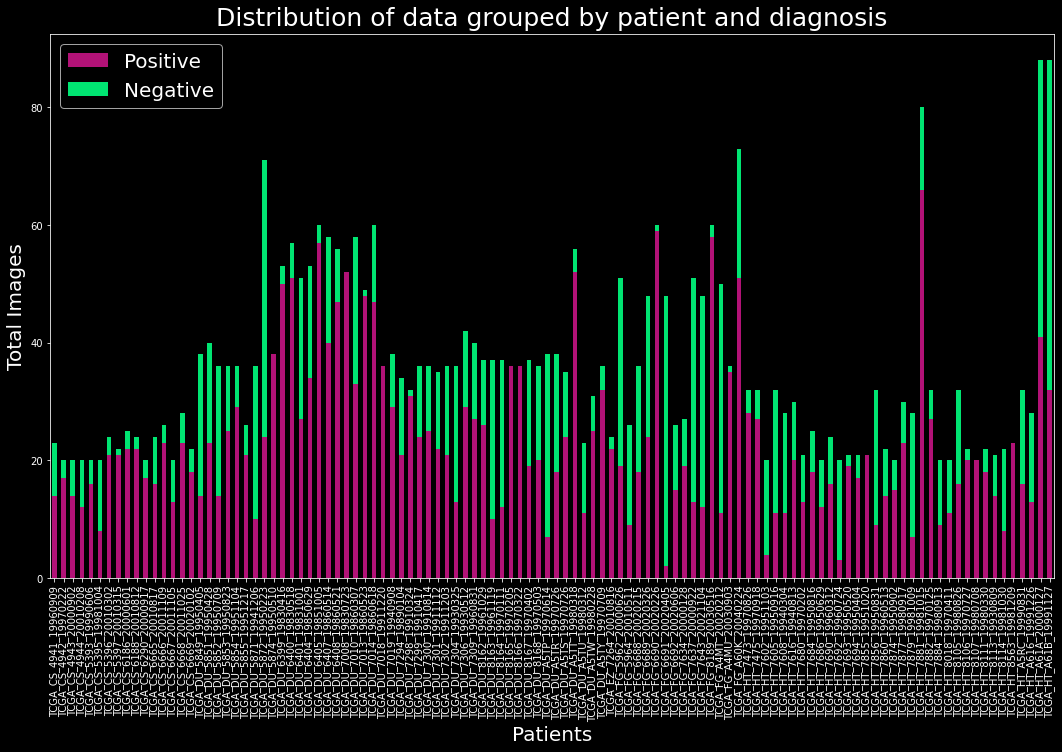

In [20]:
# Data
patients_by_diagnosis = df.groupby(['patient', 'diagnosis'])['diagnosis'].size().unstack().fillna(0)
patients_by_diagnosis.columns = ["Positive", "Negative"]

# Plot
ax = patients_by_diagnosis.plot(kind='bar',stacked=True,
                                figsize=(18, 10),
                                color=["mediumvioletred", "springgreen"], 
                                alpha=0.9)
ax.legend(fontsize=20);
ax.set_xlabel('Patients',fontsize = 20)
ax.set_ylabel('Total Images', fontsize = 20)
ax.set_title("Distribution of data grouped by patient and diagnosis",fontsize = 25, y=1.005)

# Annotations
"""for i, rows in enumerate(patients_by_diagnosis.values):
    plt.annotate(int(rows[0]), xy=(i, rows[0]+1), rotation=90, color="white")
    plt.annotate(int(rows[1]), xy=(i, rows[1]+1), rotation=90, color="aqua")""";

# Data Visualiation 
## smaples of images with a positive and negative diagnosis

In [24]:
# Data 
sample_yes_df = df[df["diagnosis"] == 1].sample(5).image_path.values
sample_no_df = df[df["diagnosis"] == 0].sample(5).image_path.values

sample_imgs = []


In [49]:
import torchvision
import torch.nn as nn
# inception_v3 = torchvision.models.Inception3()

alex_net = torchvision.models.AlexNet(num_classes=10).cuda()
# list = nn.Sequential(*list(alex_net.children))

AdaptiveAvgPool2d(output_size=(6, 6))

In [16]:
from torchinfo import summary

summary(alex_net, input_size=(3, 3, 299, 299))


Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  --                        --
├─Sequential: 1-1                        [3, 256, 8, 8]            --
│    └─Conv2d: 2-1                       [3, 64, 74, 74]           23,296
│    └─ReLU: 2-2                         [3, 64, 74, 74]           --
│    └─MaxPool2d: 2-3                    [3, 64, 36, 36]           --
│    └─Conv2d: 2-4                       [3, 192, 36, 36]          307,392
│    └─ReLU: 2-5                         [3, 192, 36, 36]          --
│    └─MaxPool2d: 2-6                    [3, 192, 17, 17]          --
│    └─Conv2d: 2-7                       [3, 384, 17, 17]          663,936
│    └─ReLU: 2-8                         [3, 384, 17, 17]          --
│    └─Conv2d: 2-9                       [3, 256, 17, 17]          884,992
│    └─ReLU: 2-10                        [3, 256, 17, 17]          --
│    └─Conv2d: 2-11                      [3, 256, 17, 17]         

In [36]:
import torch 

inp = torch.randn((3, 3, 64, 64)).type(torch.Tensor).cuda()
# inp.dtype
alex_net(inp).shape



torch.Size([3, 10])